In [2]:
import sys, os
sys.path.insert(0, 'C:/Users/Niell Lab/Documents/GitHub/FreelyMovingEphys')
from src.imu import Imu
import pandas as pd
import numpy as np
import xarray as xr
import cv2
from scipy import stats
from datetime import datetime

c:\Users\Niell Lab\anaconda3\envs\ephys0\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
c:\Users\Niell Lab\anaconda3\envs\ephys0\lib\site-packages\deeplabcut\__init__.py:78: UserWarning: 
        As PyTorch is not installed, unsupervised identity learning will not be available.
        Please run `pip install torch`, or ignore this warning.
        
  warnings.warn(


In [3]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Timestamp read-in

In [4]:
def read_timestamp_series(s):
    output_time = []
    fmt = '%H:%M:%S.%f'
    if s.dtype != np.float64:
        for current_time in s:
            str_time = str(current_time).strip()
            try:
                t = datetime.strptime(str_time, fmt)
            except ValueError as v:
                ulr = len(v.args[0].partition('unconverted data remains: ')[2])
                if ulr:
                    str_time = str_time[:-ulr]
            try:
                output_time.append((datetime.strptime(str_time, '%H:%M:%S.%f') - datetime.strptime('00:00:00.000000', '%H:%M:%S.%f')).total_seconds())
            except ValueError:
                output_time.append(np.nan)
        output_time = np.array(output_time)
    else:
        output_time = s.values
    return output_time

def read_timestamp_file(path):
    # read data and set up format
    s = pd.read_csv(path, encoding='utf-8', engine='c', header=None).squeeze()
    if s[0] == 0:
        s = s[1:]
    camT = read_timestamp_series(s)
    return camT

# Ephys vs. IMU onset timing

## Preprocess IMU

In [5]:
config = {
    'internals': {
        'flip_gyro_xy': False,
        'imu_dwnsmpl': 100,
        'imu_samprate': 30000
    }
}
recording_name = '061722_5546ESPL_control_Rig2_hf1_LED1secRAND'
recording_path = 'T:/freely_moving_ephys/ephys_recordings/061722/5546ESPL/hf1_LED1secRAND'

imu = Imu(config, recording_name, recording_path)
imu.process()

In [6]:
ephys_bin_path = 'T:/freely_moving_ephys/ephys_recordings/061722/5546ESPL/hf1_LED1secRAND/061722_5546ESPL_control_Rig2_hf1_LED1secRAND_Ephys.bin'
num_ch = 128
# set up data types to read binary file into
dtypes = np.dtype([('ch'+str(i),np.uint16) for i in range(0,num_ch)])
# read in binary file
ephys = pd.DataFrame(np.fromfile(ephys_bin_path, dtypes, -1, ''))

In [7]:
imu_file = 'T:/freely_moving_ephys/ephys_recordings/061722/5546ESPL/hf1_LED1secRAND/061722_5546ESPL_control_Rig2_hf1_LED1secRAND_imu.nc'
imu_data = xr.open_dataset(imu_file)
imuT = imu_data.__xarray_dataarray_variable__.sample.values

In [8]:
time_path = 'T:/freely_moving_ephys/ephys_recordings/061722/5546ESPL/hf1_LED1secRAND/061722_5546ESPL_control_Rig2_hf1_LED1secRAND_Ephys_BonsaiBoardTS.csv'
ephysT = read_timestamp_file(time_path)

In [9]:
t0 = ephysT[0]
t_end = ephysT[-1] - t0


In [10]:
new_imuT = imuT - t0


In [11]:
ephys_timerange = np.linspace(0, t_end, np.size(ephys,0))


In [12]:
#make new ephys to match downsampling of IMU, 30000 --> 300
new_ephys = interp1d(ephys_timerange, ephys, axis=0, bounds_error=False)(new_imuT)#, bounds_error=False)()


In [16]:
float(new_imuT[np.argwhere((np.diff(new_ephys[:, 0])>500))[0]])

0.00028200000087963417

In [21]:
# spikes_json defined below, in 'spike sorted analysis' section

spikeT_raw = spikes_json['spikeT'].copy()
#spikeT_raw = np.array(spikeT_raw)
good = [key for key in spikes_json['group'].keys() if spikes_json['group'][key] == 'good']
good

['34',
 '35',
 '43',
 '48',
 '51',
 '58',
 '62',
 '64',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '73',
 '80',
 '97',
 '99',
 '100',
 '104',
 '105',
 '108',
 '113',
 '114',
 '134',
 '136',
 '138',
 '140',
 '142',
 '143',
 '172',
 '174',
 '175',
 '178',
 '179',
 '181',
 '183',
 '188',
 '189',
 '190',
 '192',
 '195',
 '198',
 '206']

In [22]:
spikes_json.keys()

dict_keys(['Amplitude', 'ContamPct', 'KSLabel', 'amp', 'ch', 'depth', 'fr', 'group', 'n_spikes', 'sh', 'waveform', 'spikeT', 't0'])

In [23]:
imuTc1 = new_imuT - (ephys_offset + new_imuT * ephys_drift_rate)

In [24]:
ephys_timerange = np.linspace(0, t_end, np.size(ephys,0))

In [25]:
imu_bin_path = 'T:/freely_moving_ephys\ephys_recordings/061722/5546ESPL/hf1_LED1secRAND/061722_5546ESPL_control_Rig2_hf1_LED1secRAND_IMU.bin'

In [26]:
dtypes = np.dtype([
    ("acc_x",np.uint16),
    ("acc_y",np.uint16),
    ("acc_z",np.uint16),
    ("none1",np.uint16),
    ("gyro_x",np.uint16),
    ("gyro_y",np.uint16),
    ("gyro_z",np.uint16),
    ("none2",np.uint16)
])
# read in binary file
data = pd.DataFrame(np.fromfile(imu_bin_path, dtypes, -1, ''))
data = data.to_numpy()

In [27]:
ephys = ephys.to_numpy()

In [28]:
print(ephys.shape)
print(new_ephys.shape)


(18182144, 128)
(181822, 128)


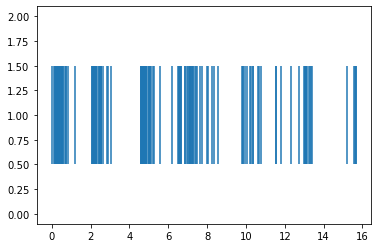

In [29]:
spikeT_raw = spikes_json['spikeT']
plt.eventplot(spikeT_raw['79'][:200]) #first 200 spikes 

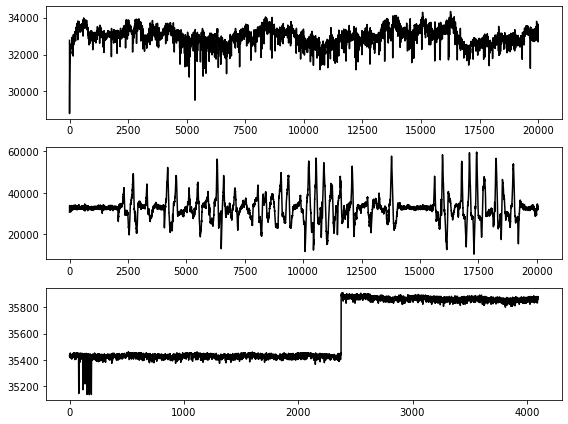

In [30]:
start = 0#int(1e5)
stop = start+200000 #int(1.5e5)

# ephys_onset = float(new_imuT[np.argwhere((np.diff(new_ephys[:, 0])>500))[0]])
# imu_onset = float(new_imuT[np.argwhere((np.diff(gyro_x[:])>50))[0]])

plt.subplots(3,1,figsize=(8,6))

plt.subplot(311)
plt.plot(ephys[start:20000, 79], color='k')
# plt.title('ephys (ch=0), onset={} msec'.format(np.round((ephys_onset-new_imuT[start])*1000,1)))
# plt.xticks(np.linspace(new_imuT[start], new_imuT[stop], 8),
#            labels=np.linspace(0, (new_imuT[stop] - new_imuT[start])*1000, 8).astype(int))
# plt.vlines(ephys_onset, np.min(new_ephys[start:stop, 0]), np.max(new_ephys[start:stop, 0]))

plt.subplot(313)
plt.plot(data[29900:34000, 4], color='k')
# plt.title('gyro x, onset={} msec'.format(np.round((imu_onset-new_imuT[start])*1000,1)))
# plt.xticks(np.linspace(new_imuT[start], new_imuT[stop], 8),
#            labels=np.linspace(0, (new_imuT[stop] - new_imuT[start])*1000, 8).astype(int))
# plt.xlabel('msec')
# plt.vlines(imu_onset, np.min(gyro_x[start:stop]), np.max(gyro_x[start:stop]))
plt.subplot(312)
plt.plot(new_ephys[start:20060, 79], color='k') #matches IMU downsampling (300 Hz)

plt.tight_layout()

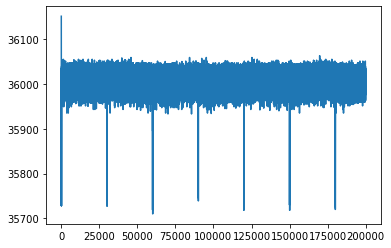

In [31]:
#plt.plot(filtspikes[start:stop, 34], color='k', alpha = 0.5)

plt.plot(data[start:stop, 7])
#for n in range(0,10):
    #plt.axvline(x = spikeT_raw['34'][n] *30000)


In [34]:
binrate_all = []
for cell in good:
    binrate,_= np.histogram((spikeT_raw[cell]), bins = np.arange(0, elements,(1/300)))
    binrate_all.append(binrate)

binrate_all = np.stack(binrate_all)
bin_length = int(np.round(300*1)) #setting the time bin over which it is smoothed

smooth_FR = np.apply_along_axis(lambda m: np.convolve(m, np.ones(bin_length), mode='same'),axis=1,arr=binrate_all)#[bin_length:-bin_length] /(bin_length*(1/300))


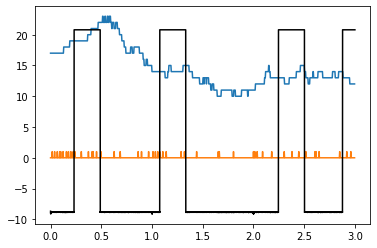

In [35]:
cell =27 #2, 4, 9, 11, 14, 27, 33, 
start1 = int(np.round(0*300))
stop1 = start1 + int(np.round(3*300))
start = int(np.round(0*30000))
stop = start +int(np.round(3*30000))

plt.plot((1/300)*np.arange(0,smooth_FR[:,start1:stop1].shape[1]),smooth_FR[cell,start1:stop1])
plt.plot((1/300)*np.arange(0,binrate_all[:,start1:stop1].shape[1]),binrate_all[cell,start1:stop1])
plt.plot((1/30000)*np.arange(0,data[start:stop,3].shape[0]),(data[start:stop,3]-np.mean(data[start:stop,3]))/1000, color='k')

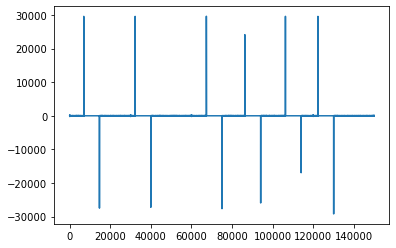

In [36]:
#find ttl switches
ttl = data[:,3].astype(float)
plt.plot(np.diff(ttl[:5*30000]))
#find all points where diff is large, np.where will find a list
switches = np.where(np.diff(ttl)>13000)
switches = np.array(switches)
switchesT = switches[0, :]


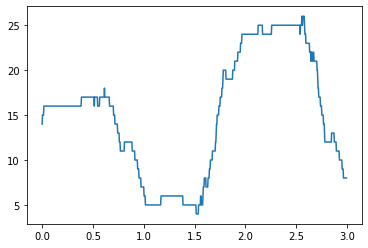

In [37]:
cell = 9
pre = -int(0.5*30000)
post = int(0.5*30000)
plt.plot((1/300)*np.arange(0,smooth_FR[:,start1:stop1].shape[1]),smooth_FR[cell,start1:stop1])

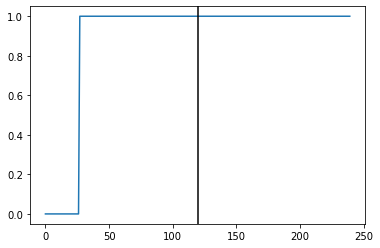

In [38]:
pre = -int(0.4*30000)
post = int(0.4*30000)
cell = 43
smooth_cell_fr = smooth_FR[cell]
switch_pre = int((switchesT[200]+pre)/100)
switch_post = int((switchesT[200]+post)/100)
plt.plot(smooth_cell_fr[switch_pre:switch_post])
plt.axvline(x = post/100, color = 'k')
#print(smooth_cell_fr.shape)
#print(max(switchesT))
#print(1816233/10)
#plt.plot((1/300)*np.arange(0,smooth_FR[:,switchesT[0]+pre:switchesT[0]+post].shape[1]),smooth_FR[cell,switchesT[0]+pre:switchesT[0]+post])
#plt.axvline(x = post, color = 'k')

#mean_switches_cell = np.mean(smooth_FR[cell, (switchesT+pre):(switchesT+post)])
#means_switches = np.array([])
#for n in np.arange(len(switchesT)):
    #mean_cell = np.mean(smooth_FR[cell,switchesT[n]+pre:switchesT[n]+post])
    #np.append(means_switches, mean_cell)
#mean_cell = np.mean(smooth_FR[cell,switchesT[n]+pre:switchesT[n]+post])

#plt.plot(np.mean(smooth_FR[8, switchesT[2]+pre:switchesT[2]+post]))
#plt.plot(mean_cell)
#plt.plot((1/300)*np.arange(0,smooth_FR[:,switchesT[2]+pre:switchesT[2]+post].shape[1]),smooth_FR[cell,switchesT[2]+pre:switchesT[2]+post])

In [39]:
from sklearn import preprocessing


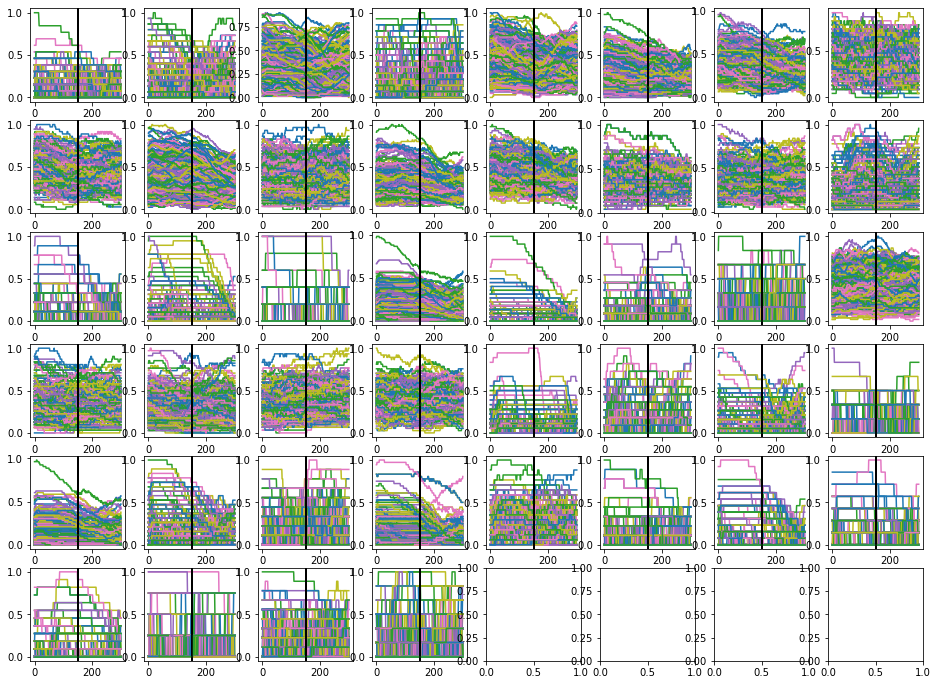

In [40]:
#have all switch times in timecourse of 300Hz, not 30k Hz
#save an array of time courses. -/+ 500 ms around switch

pre = -int(0.5*30000)
post = int(0.5*30000)
switches_correct_tc = np.array([])
for n in np.arange(len(switchesT)):
    switch_pre = int((switchesT[n]+pre)/100)
    switch_post = int((switchesT[n]+post)/100)
    range = switch_pre, switch_post
    switches_correct_tc = np.append(switches_correct_tc, range)
switches_correct_tc = switches_correct_tc.astype(int)
switches_correct_tc
switches_correct_tc = switches_correct_tc.reshape(622, 2) 

#select a single cell, and plot each time course over each other

plt.subplots(6,8, figsize = (16,12))
for n in np.arange(len(good)):
    cell = n
    smooth_cell_fr = smooth_FR[cell,:]
    norm_smooth_cell_fr = ((smooth_cell_fr-np.min(smooth_cell_fr))/((np.max(smooth_cell_fr)- np.min(smooth_cell_fr))))
    for m in np.arange(int(len(switchesT))):
        plt.subplot(6,8,n+1)
        trial_smooth_cell_norm_fr = norm_smooth_cell_fr[switches_correct_tc[m,0]:switches_correct_tc[m,1]]
        plt.plot(trial_smooth_cell_norm_fr)
        plt.plot(np.mean(norm_smooth_cell_fr[n]))
        plt.axvline(x = post/100, color = 'k')
    
    
        



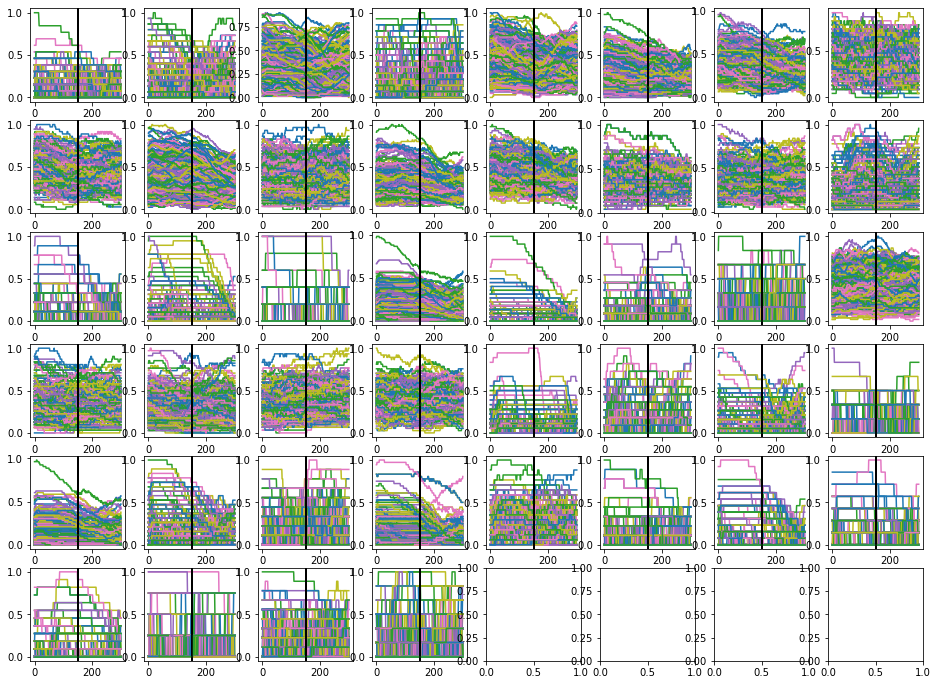

In [55]:

plt.subplots(6,8, figsize = (16,12))
for n in np.arange(len(good)):
    cell = n
    smooth_cell_fr = smooth_FR[cell,:]
    norm_smooth_cell_fr = ((smooth_cell_fr-np.min(smooth_cell_fr))/((np.max(smooth_cell_fr)- np.min(smooth_cell_fr))))
    cell_all_trials = np.empty([622])
    for m in np.arange(int(len(switchesT))):
        plt.subplot(6,8,n+1)
        trial_smooth_cell_norm_fr = norm_smooth_cell_fr[switches_correct_tc[m,0]:switches_correct_tc[m,1]]
        #cell_all_trials[n] = trial_smooth_cell_norm_fr
        plt.plot(trial_smooth_cell_norm_fr)
        plt.plot(np.mean(norm_smooth_cell_fr[n]))
        plt.axvline(x = post/100, color = 'k')
    
    
        


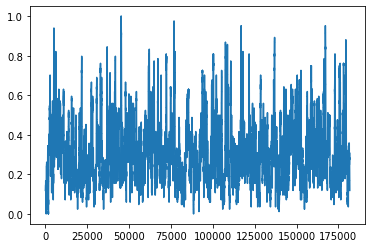

In [54]:
smooth_cell_fr = smooth_FR[9,:]
norm_smooth_cell_fr = ((smooth_cell_fr-np.min(smooth_cell_fr))/((np.max(smooth_cell_fr)- np.min(smooth_cell_fr))))


plt.plot(norm_smooth_cell_fr)

In [416]:
norm_smooth_cell_fr.shape

(181799,)

43

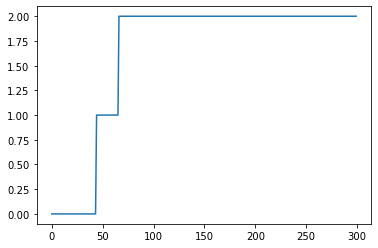

In [402]:
plt.plot(smooth_cell_fr[switches_correct_tc[n,0]:switches_correct_tc[n,1]])
len(good)
n
smooth_FR
cell

622

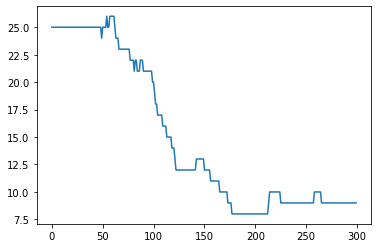

In [278]:
plt.plot(smooth_cell_fr[switches_correct_tc[6]:switches_correct_tc[7]])

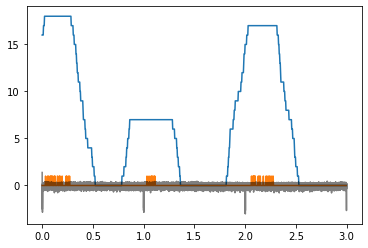

In [118]:
cell = 2 
start1 = 0*300
stop1 = start1 + int(np.round(3*300))
start = 0*30000
stop = start + 3*30000

plt.plot((1/300)*np.arange(0,smooth_FR[:,start1:stop1].shape[1]),smooth_FR[cell,start1:stop1])
plt.plot((1/300)*np.arange(0,binrate_all[:,start1:stop1].shape[1]),binrate_all[cell,start1:stop1])
plt.plot((1/30000)*np.arange(0,data[start:stop,7].shape[0]),(data[start:stop,7]-np.mean(data[start:stop,7]))/100, color='k', alpha = 0.5)


In [383]:
smooth_FR[:,start1:stop1].shape[1]


1890

In [342]:
binrate_all.shape

(44, 181799)

In [33]:
elements = np.round((ephys.shape[0]) / 30000)
elements = int(elements)
elements


606

In [1]:
start = 0#int(1e5)
stop = start+200000 #int(1.5e5)

# ephys_onset = float(new_imuT[np.argwhere((np.diff(new_ephys[:, 0])>500))[0]])
# imu_onset = float(new_imuT[np.argwhere((np.diff(gyro_x[:])>50))[0]])

plt.subplots(3,1,figsize=(8,6))

plt.subplot(311)
plt.plot(ephys[start:20000, 79], color='k')
# plt.title('ephys (ch=0), onset={} msec'.format(np.round((ephys_onset-new_imuT[start])*1000,1)))
# plt.xticks(np.linspace(new_imuT[start], new_imuT[stop], 8),
#            labels=np.linspace(0, (new_imuT[stop] - new_imuT[start])*1000, 8).astype(int))
# plt.vlines(ephys_onset, np.min(new_ephys[start:stop, 0]), np.max(new_ephys[start:stop, 0]))

plt.subplot(313)
plt.plot(data[start:stop, 4], color='k')
# plt.title('gyro x, onset={} msec'.format(np.round((imu_onset-new_imuT[start])*1000,1)))
# plt.xticks(np.linspace(new_imuT[start], new_imuT[stop], 8),
#            labels=np.linspace(0, (new_imuT[stop] - new_imuT[start])*1000, 8).astype(int))
# plt.xlabel('msec')
# plt.vlines(imu_onset, np.min(gyro_x[start:stop]), np.max(gyro_x[start:stop]))
plt.subplot(312)
plt.plot(new_ephys[start:20060, 79], color='k') #matches IMU downsampling (300 Hz)

plt.tight_layout()

NameError: name 'plt' is not defined

# Checkerboard timing using worldcam vs. TTL

In [22]:
rec_path = 'T:/freely_moving_ephys/ephys_recordings/061722/5546ESPL/hf1_LED1secRAND'
imu_bin = os.path.join(rec_path, '061722_5546ESPL_control_Rig2_hf1_LED1secRAND_IMU.bin')
#world_nc = os.path.join(rec_path, '041422_J599RT_control_Rig2_hf1_revchecker500ms_world.nc')
ephys_csv = os.path.join(rec_path, '061722_5546ESPL_control_Rig2_hf1_LED1secRAND_Ephys_BonsaiBoardTS.csv#')

In [19]:
Rc_world = xr.open_dataset(world_nc)

FileNotFoundError: [Errno 2] No such file or directory: b'c:\\home\\niell_lab\\Data\\freely_moving_ephys\\ephys_recordings\\041422\\J599RT\\hf1_revchecker500ms\\041422_J599RT_control_Rig2_hf1_revchecker500ms_world.nc'

In [ ]:
vid = Rc_world.WORLD_video.values.astype(np.uint8)

In [ ]:
worldT = Rc_world.timestamps.values

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
num_frames = np.size(vid, 0); vid_width = np.size(vid, 1); vid_height = np.size(vid, 2)
kmeans_input = vid.reshape(num_frames, vid_width*vid_height)
_, labels, _ = cv2.kmeans(kmeans_input.astype(np.float32), 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
label_diff = np.diff(np.ndarray.flatten(labels))

In [ ]:
eventT = worldT[np.where((label_diff<-0.1)+(label_diff>0.1))]

In [23]:
dtypes = np.dtype([
    ("acc_x",np.uint16),
    ("acc_y",np.uint16),
    ("acc_z",np.uint16),
    ("none1",np.uint16),
    ("gyro_x",np.uint16),
    ("gyro_y",np.uint16),
    ("gyro_z",np.uint16),
    ("none2",np.uint16)
])
# read in binary file
data = pd.DataFrame(np.fromfile(imu_bin, dtypes, -1, ''))
data = data.to_numpy()
ttl_onset = data[:,3].copy()
ttl_on = data[:,7].copy()

In [ ]:
onset = ttl_onset - np.median(ttl_onset)
onsetInd = np.argwhere(np.diff(onset)>1e4).flatten()

In [ ]:
onsetInd1 = onsetInd.copy()
onsetInd1 = onsetInd1[np.argwhere((np.diff(onsetInd1)>1)).flatten()]

In [61]:
# read in timestamps
csv_data = pd.read_csv(ephys_csv).squeeze()
pdtime = pd.DataFrame(read_timestamp_series(csv_data))
# get first/last timepoint, num_samples
t0 = pdtime.iloc[0,0]; num_samp = np.size(data,0)
samp_freq = 30000
# samples start at t0, and are acquired at rate of 'ephys_sample_rate'/ 'imu_downsample'
newtime = np.array(t0 + np.linspace(0, num_samp-1, num_samp) / samp_freq)

In [62]:
ephys_offset = 0.1
ephys_drift_rate = -0.000114
newtime = newtime - newtime[0]
newtime1 = newtime - (ephys_offset + newtime * ephys_drift_rate)

In [ ]:
worldT = worldT - t0

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(newtime1-newtime1[0], ttl_onset-np.median(ttl_onset), '-')
plt.plot(worldT-newtime1[0], labels*60000, '-')
plt.xlim([300, 303])

In [ ]:
onset_from_ttl = newtime[onsetInd1].copy()
onset_from_worldcam = eventT.copy()

In [ ]:
best_match = np.zeros(onset_from_worldcam.size)
for wcI, wcT in enumerate(onset_from_worldcam):
    best_match[wcI] = onset_from_ttl[np.argmin(np.abs(onset_from_ttl-wcT))]

In [ ]:
delay_after_ttl = best_match - onset_from_worldcam
delay_after_ttl = (delay_after_ttl * 1000)

In [ ]:
onset_from_ttl.shape

In [ ]:
plt.subplots(2,1,figsize=(4,6))

plt.subplot(211)
plt.hist(np.diff(onset_from_ttl)*1000, bins=np.arange(500,570,2))
plt.xlim([500,560])
plt.title('TTL')

plt.subplot(212)
plt.hist(np.diff(onset_from_worldcam)*1000, bins=np.arange(500,570,2))
plt.xlim([500,560])
plt.title('Worldcam')

plt.tight_layout()

In [ ]:
plt.subplots(2,1,figsize=(4,6))

plt.subplot(211)
plt.plot(np.diff(onset_from_ttl)*1000)
plt.xlim([0,120]); plt.ylim([510,550])
plt.title('TTL')
plt.ylabel('flip diff (msec)'); plt.xlabel('sample')

plt.subplot(212)
plt.plot(np.diff(onset_from_worldcam)*1000)
plt.xlim([0,120]); plt.ylim([510,550])
plt.title('Worldcam')
plt.ylabel('flip diff (msec)'); plt.xlabel('sample')

plt.tight_layout()

In [ ]:
plt.plot(onset_from_worldcam[:-20], delay_after_ttl[:-20], 'k')
plt.ylabel('delay after ttl (msec)'); plt.xlabel('time of flip')
# plt.ylim([100, -100])

In [ ]:
res = stats.linregress(onset_from_worldcam[:-20], delay_after_ttl[:-20])

In [ ]:
res

In [ ]:
res.slope

# LFP vs. spikeT from ephys analysis

In [ ]:
import json

In [ ]:
ephys_df = pd.read_hdf('/home/niell_lab/Mounts/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/070921/J553RT/hf4_revchecker/070921_J553RT_control_Rig2_hf4_revchecker_ephys_props.h5')#not generate for LED recordings, probably due to naming/string?

In [ ]:
ephys_bin_path = '/home/niell_lab/Mounts/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/070921/J553RT/hf4_revchecker/070921_J553RT_control_Rig2_hf4_revchecker_Ephys.bin'

In [ ]:
channel_map_path = '/home/niell_lab/Documents/GitHub/FreelyMovingEphys/config/channel_maps.json'

In [ ]:
ephys_timepath = '/home/niell_lab/Mounts/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/070921/J553RT/hf4_revchecker/070921_J553RT_control_Rig2_hf4_revchecker_Ephys_BonsaiBoardTS.csv'
ephysT = read_timestamp_file(ephys_timepath)
t0 = ephysT[0]

In [ ]:
num_ch = 128
# set up data types to read binary file into
dtypes = np.dtype([('ch'+str(i),np.uint16) for i in range(0,num_ch)])
# read in binary file
ephys = pd.DataFrame(np.fromfile(ephys_bin_path, dtypes, -1, ''))

# open channel map file
with open(channel_map_path, 'r') as fp:
    all_maps = json.load(fp)
# get channel map for the current probe
ch_map = all_maps['DB_P128-6']
# remap with known order of channels
ephys = ephys.iloc[:,[i-1 for i in list(ch_map)]]

In [ ]:
ephys = ephys.to_numpy()

In [ ]:
ephys_df.index.values

In [ ]:
ind = 31
spikeT = ephys_df.loc[ind, 'spikeT']

In [ ]:
spikeT.shape

In [ ]:
ephys_df.loc[ind, 'ch']

In [ ]:
num_samp = np.size(ephys,0)
samp_freq = 30000
# samples start at t0, and are acquired at rate of 'ephys_sample_rate'/ 'imu_downsample'
newtime = np.array(t0 + np.linspace(0, num_samp-1, num_samp) / samp_freq)

In [ ]:
newtime.shape

In [ ]:
lfp.shape

In [ ]:
lfp = ephys[:, 6].copy()

In [ ]:
ephys_offset = 0.1
ephys_drift_rate = -0.000114
newtime = newtime - newtime[0]
newtime1 = newtime - (ephys_offset + newtime * ephys_drift_rate)

In [ ]:
plt.figure(figsize=(9,9))
plt.vlines(spikeT, 3000, 32000, color='r')
plt.plot(newtime1, lfp, '-')
plt.xlim([14.56,14.57])
plt.ylim([30000,32000])

In [ ]:
plt.figure(figsize=(9,9))
plt.plot(spikeT, 32000*np.ones(len(spikeT)), 'r*')
plt.plot(newtime1, lfp, '-')
plt.xlim([27,27.2])
# plt.ylim([30000,32000])

In [ ]:
a = np.zeros(len(lfp))

In [ ]:
spikeInd = np.zeros(len(spikeT))
for i,t in enumerate(spikeT):
    spikeInd[i] = np.argmin(np.abs(newtime1-t))

In [ ]:
a[spikeInd.astype(int)] = 1

In [ ]:
from src.utils.correlation import nanxcorr

In [ ]:
use_lfp = np.zeros([len(spikeInd),2000])
for i, t in enumerate(spikeInd):
    use_lfp[i] = lfp[(t.astype(int)-1000):(t.astype(int)+1000)]

In [ ]:
for i in range(np.size(use_lfp,0)):
    plt.plot(use_lfp[i,:]-np.median(use_lfp[i,:]), '-')

In [ ]:
plt.plot(np.mean(use_lfp,0))
plt.xlim([900,1100])
plt.vlines(1000,32000,32800,'k')

In [ ]:
200/30000

# LFP vs. spike raster from filtered LFP

In [ ]:
from scipy.signal import butter, sosfiltfilt

In [ ]:
ephys_timepath = '/home/niell_lab/Mounts/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/070921/J553RT/hf4_revchecker/070921_J553RT_control_Rig2_hf4_revchecker_Ephys_BonsaiBoardTS.csv'
ephysT = read_timestamp_file(ephys_timepath)
t0 = ephysT[0]

In [246]:
def butter_bandpass(lfp, lowcut=1, highcut=300, fs=30000, order=5):
    nyq = 0.5 * fs # Nyquist frequency
    low = lowcut / nyq # low cutoff
    high = highcut / nyq # high cutoff
    sos = butter(order, [low, high], btype='bandpass', output='sos')
    filt = sosfiltfilt(sos, lfp, axis=0)
    return filt

In [ ]:
lfp_ephys = ephys.copy()

In [ ]:
ephys_center_sub = lfp_ephys - np.mean(lfp_ephys, 0)
filt_ephys = butter_bandpass(ephys_center_sub, order=6)

In [ ]:
filt_ephys.shape

In [ ]:
num_samp = np.size(ephys,0)
samp_freq = 30000
# samples start at t0, and are acquired at rate of 'ephys_sample_rate'/ 'imu_downsample'
newtime = np.array(t0 + np.linspace(0, num_samp-1, num_samp) / samp_freq)

In [ ]:
ephys_offset = 0.1
ephys_drift_rate = -0.000114
newtime = newtime - newtime[0]
newtime1 = newtime - (ephys_offset + newtime * ephys_drift_rate)

In [ ]:
world_nc = '/home/niell_lab/Mounts/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/070921/J553RT/hf4_revchecker/070921_J553RT_control_Rig2_hf4_revchecker_world.nc'
Rc_world = xr.open_dataset(world_nc)
vid = Rc_world.WORLD_video.values.astype(np.uint8)
worldT = Rc_world.timestamps.values

In [ ]:
worldT = read_timestamp_file('/home/niell_lab/Mounts/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/070921/J553RT/hf4_revchecker/070921_J553RT_control_Rig2_hf4_revchecker_WORLD_BonsaiTS.csv')

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
num_frames = np.size(vid, 0); vid_width = np.size(vid, 1); vid_height = np.size(vid, 2)
kmeans_input = vid.reshape(num_frames, vid_width*vid_height)
_, labels, _ = cv2.kmeans(kmeans_input.astype(np.float32), 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
label_diff = np.diff(np.ndarray.flatten(labels))

In [ ]:
eventT = worldT[np.where((label_diff<-0.1)+(label_diff>0.1))]

In [ ]:
vidread = cv2.VideoCapture('/home/niell_lab/Mounts/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/070921/J553RT/hf4_revchecker/070921_J553RT_control_Rig2_hf4_revchecker_WORLD.avi')
world_vid = np.empty([int(vidread.get(cv2.CAP_PROP_FRAME_COUNT)),
                    int(vidread.get(cv2.CAP_PROP_FRAME_HEIGHT)*0.25),
                    int(vidread.get(cv2.CAP_PROP_FRAME_WIDTH)*0.25)], dtype=np.uint8)
# iterate through each frame
for frame_num in range(0,int(vidread.get(cv2.CAP_PROP_FRAME_COUNT))):
    # read the frame in and make sure it is read in correctly
    ret, frame = vidread.read()
    if not ret:
        break
    # convert to grayscale
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # downsample the frame by an amount specified in the config file
    sframe = cv2.resize(frame, (0,0), fx=0.25, fy=0.25, interpolation=cv2.INTER_NEAREST)
    # add the downsampled frame to all_frames as int8
    world_vid[frame_num,:,:] = sframe.astype(np.int8)

In [ ]:
world_vid.shape

In [ ]:
from tqdm import tqdm

# get approx. spike times out of LFP

In [ ]:
cam_gamma = 2
world_norm = (world_vid/255)**cam_gamma
std_im = np.std(world_norm,axis=0)
std_im[std_im<10/255] = 10/255
img_norm = (world_norm-np.mean(world_norm,axis=0))/std_im
img_norm = img_norm * (std_im>20/255)
img_norm[img_norm<-2] = -2
movInterp = interp1d(worldT, img_norm, axis=0, bounds_error=False)
all_spikeT = []
for ch in tqdm(range(np.size(filt_ephys,1))):
    spike_thresh = -350 # 350
    spike_inds = list(np.where(filt_ephys[:,ch] < spike_thresh)[0])
    spikeT = newtime[spike_inds]
    all_spikeT.append(spikeT - (ephys_offset + spikeT * ephys_drift_rate))

In [ ]:
len(all_spikeT[45])

In [ ]:
flip = eventT[3] - t0
flip

In [ ]:
flipInd = np.argmin(np.abs(flip-(newtime1)))
flipInd

In [ ]:
use = eventT.copy()
use = use - t0
use = use[use>szT]
use = use[:2000]

In [ ]:
5000*(1/30000)

In [ ]:
filt_ephys.shape

In [ ]:
ephys_df.index.values

In [ ]:
ephys_df[ephys_df['ch']==1].index.values

In [ ]:
unit = 7 # 71, 32, 338
ch = int(ephys_df.loc[unit, 'ch'])

sz = 5000
szT = np.median(np.diff(newtime1))*(sz*2)

plot_lfp = np.zeros([use.size, sz*2])

sp = all_spikeT[ch].copy()
sp1 = ephys_df.loc[unit, 'spikeT'].copy()

fig, [ax0, ax1, ax2] = plt.subplots(3,1,figsize=(4,6), dpi=300)

for i, f in enumerate(use):
    ind = np.argmin(np.abs(f-(newtime1)))
    startInd = ind-sz; endInd = ind+sz
    startT = f-szT; endT = f+szT
    
    plot_lfp[i,:] = filt_ephys[startInd:endInd, ch].copy()
    # ax0.plot(plot_lfp[i,:], linewidth=1, alpha=0.5)
    
    # raster
    ax1.vlines(sp[(sp>startT) & (sp<endT)]-f, i-0.25, i+0.25)
    
    ax2.vlines(sp1[(sp1>startT) & (sp1<endT)]-f, i-0.25, i+0.25)
    
ax1.vlines(0, 0, 120, 'k')
ax1.set_xlim([-.3,.3])
ax1.set_xlabel('sec')
ax1.set_ylabel('flip')

ax2.vlines(0, 0, 120, 'k')
ax2.set_xlim([-.3,.3])
ax2.set_xlabel('sec')
ax2.set_ylabel('flip')

ax0.set_title('LFP')
ax1.set_title('spikeT from LFP')
ax2.set_title('spikeT from ephys analysis')

cent = np.mean(plot_lfp)
# ax0.set_ylim([cent-500, cent+500])
ax0.plot(np.mean(plot_lfp,0), 'k', linewidth=4)
# ax0.vlines(5000,-2000,2000,'k')
ax0.set_xticks(np.linspace(0, sz*2, 7), labels=np.round(np.arange(-0.3, 0.4, 0.1), 1))
ax0.set_xlim([0,sz*2])

fig.tight_layout()

In [ ]:
[x for x in ephys_df.columns if 'um' in x]

In [ ]:
ephys_df.loc[7, 'depth']

In [ ]:
np.round(np.arange(-0.3, 0.4, 0.1), 1)

In [ ]:
plot_lfp.shape

In [ ]:
sp = all_spikeT[ch].copy()
spcrop = sp[(sp>startT) & (sp<endT)]

In [ ]:
endT

In [ ]:
startT

In [ ]:
szT

In [ ]:
ind

In [ ]:
endInd

In [ ]:
startInd

In [ ]:
sp[(sp>startT) & (sp<endT)]

# LFP and spikeT aligned to flips from TTL and worldcam

In [14]:
rec_path = 'T:/freely_moving_ephys/ephys_recordings/061722/5546ESPL/hf1_LED1secRAND'
imu_bin = os.path.join(rec_path, '061722_5546ESPL_control_Rig2_hf1_LED1secRAND_IMU.bin')
ephys_bin = os.path.join(rec_path, '061722_5546ESPL_control_Rig2_hf1_LED1secRAND_Ephys.bin')
world_nc = os.path.join(rec_path, '060922_J611RN_control_Rig2_hf3_LED1sec_world.nc')
ephys_csv = os.path.join(rec_path, '061722_5546ESPL_control_Rig2_hf1_LED1secRAND_Ephys_BonsaiBoardTS.csv')
ephys_json = os.path.join(rec_path, '061722_5546ESPL_control_Rig2_hf1_LED1secRAND_ephys_merge.json')

## worldcam

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
num_frames = np.size(vid, 0); vid_width = np.size(vid, 1); vid_height = np.size(vid, 2)
kmeans_input = vid.reshape(num_frames, vid_width*vid_height)
_, labels, _ = cv2.kmeans(kmeans_input.astype(np.float32), 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
label_diff = np.diff(np.ndarray.flatten(labels))

In [ ]:
eventT = worldT[np.where((label_diff<-0.1)+(label_diff>0.1))]

## spike sorted ephys

In [16]:
import json
with open(ephys_json, 'r') as fp:
    spikes_json = json.load(fp)

In [17]:
spikes_json.keys()


dict_keys(['Amplitude', 'ContamPct', 'KSLabel', 'amp', 'ch', 'depth', 'fr', 'group', 'n_spikes', 'sh', 'waveform', 'spikeT', 't0'])

In [20]:
spikeT = {}; chan = {}; f_rate = {}
for i, ind in enumerate(spikes_json['spikeT'].keys()):
    if spikes_json['KSLabel'][ind]=='good':
        spikeT[int(ind)] = spikes_json['spikeT'][ind]
        chan[int(ind)] = spikes_json['ch'][ind]
        f_rate[int(ind)] = spikes_json['fr'][ind]

In [19]:
# time drift correction
ephys_offset = 0.1
ephys_drift_rate = -0.000114

for ch in spikeT.keys():
    sp = np.array(spikeT[ch])
    spikeT[ch] = sp - (ephys_offset + sp * ephys_drift_rate)


## ephys

In [248]:
from scipy.signal import butter, sosfiltfilt

(71216,)

In [52]:
ephysT = read_timestamp_file(ephys_csv)
t0 = ephysT[0]

In [53]:
def butter_bandpass(lfp, lowcut=1, highcut=300, fs=30000, order=5):
    nyq = 0.5 * fs # Nyquist frequency
    low = lowcut / nyq # low cutoff
    high = highcut / nyq # high cutoff
    sos = butter(order, [low, high], btype='bandpass', output='sos')
    filt = sosfiltfilt(sos, lfp, axis=0)
    return filt

In [303]:
num_ch = 128
# set up data types to read binary file into
dtypes = np.dtype([('ch'+str(i),np.uint16) for i in range(0,num_ch)])
# read in binary file
ephys = pd.DataFrame(np.fromfile(ephys_bin, dtypes, -1, '')).to_numpy().astype(np.int64)

In [307]:
ephys = ephys - np.mean(ephys, 0)

(18231296, 128)

In [249]:
filtspikes = butter_bandpass(ephys, lowcut=800, highcut=8000, fs=30000, order=6)

In [71]:
filtlfp = butter_bandpass(ephys, order=6)

In [302]:
# read in timestamps
csv_data = pd.read_csv(ephys_csv).squeeze()
pdtime = pd.DataFrame(read_timestamp_series(csv_data))
# get first/last timepoint, num_samples
t0 = pdtime.iloc[0,0]; num_samp = np.size(filtephys,0)
samp_freq = 30000
# samples start at t0, and are acquired at rate of 'ephys_sample_rate'/ 'imu_downsample'
newtime = np.array(t0 + np.linspace(0, num_samp-1, num_samp) / samp_freq)

NameError: name 'filtephys' is not defined

In [16]:
ephys_offset = 0.1
ephys_drift_rate = -0.000114
newtime = newtime - newtime[0]
newtime1 = newtime - (ephys_offset + newtime * ephys_drift_rate)

In [18]:
from tqdm import tqdm

In [42]:
lfp_spikeT = []
for ch in tqdm(range(np.size(filtephys,1))):
    spike_thresh = -350 # 350
    spike_inds = list(np.where(filtephys[:,ch] < spike_thresh)[0])
    sp = newtime1[spike_inds]
    lfp_spikeT.append(sp)
    # lfp_spikeT.append(sp - (ephys_offset + sp * ephys_drift_rate))

100%|█████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.65it/s]


In [54]:
plt.plot(filtephys[:60000,0])

NameError: name 'filtephys' is not defined

In [33]:
len(lfp_spikeT[0])

1447136

In [35]:
lfp_spikeT[0][:20]

array([-0.03162554, -0.0315922 , -0.03155887, -0.03152553, -0.03149219,
       -0.03145885, -0.03142552, -0.03139218, -0.03135884, -0.03132551,
       -0.03129217, -0.03125883, -0.03122549, -0.03119216, -0.03115882,
       -0.03112548, -0.03109215, -0.03105881, -0.03102547, -0.03099213])

In [21]:
len(newtime1)

9326592

## spikes from lfp

In [ ]:
# all_spikeT = []
# for ch in range(np.size(filt_ephys,1)):
#     spike_thresh = -350 # 350
#     spike_inds = list(np.where(filt_ephys[:,ch] < spike_thresh)[0])
#     spikeT = newtime1[spike_inds]
    # all_spikeT.append(spikeT - (ephys_offset + spikeT * ephys_drift_rate))

## TTL

In [55]:
dtypes = np.dtype([
    ("acc_x",np.uint16),
    ("acc_y",np.uint16),
    ("acc_z",np.uint16),
    ("none1",np.uint16),
    ("gyro_x",np.uint16),
    ("gyro_y",np.uint16),
    ("gyro_z",np.uint16),
    ("none2",np.uint16)
])
# read in binary file
ttl = pd.DataFrame(np.fromfile(imu_bin, dtypes, -1, '')).to_numpy()
ttl_onset = ttl[:,3].copy()
ttl_on = ttl[:,7].copy()

In [56]:
onset = ttl_onset - np.median(ttl_onset)
onsetInd = np.argwhere(np.diff(onset)>1e4).flatten()

In [57]:
onsetInd1 = onsetInd.copy()
onsetInd1 = onsetInd1[np.argwhere((np.diff(onsetInd1)>1)).flatten()]

In [390]:
spikes_json['ch']

{'0': 1,
 '1': 7,
 '2': 8,
 '3': 45,
 '4': 8,
 '5': 9,
 '6': 11,
 '7': 11,
 '8': 12,
 '9': 13,
 '10': 13,
 '11': 14,
 '12': 15,
 '13': 15,
 '14': 15,
 '15': 16,
 '16': 16,
 '17': 17,
 '18': 17,
 '19': 18,
 '20': 18,
 '21': 19,
 '22': 19,
 '23': 19,
 '24': 19,
 '25': 20,
 '26': 20,
 '27': 21,
 '28': 22,
 '29': 22,
 '30': 23,
 '31': 23,
 '32': 24,
 '33': 24,
 '34': 25,
 '35': 25,
 '36': 26,
 '37': 26,
 '38': 27,
 '39': 27,
 '40': 27,
 '41': 28,
 '42': 29,
 '43': 30,
 '44': 31,
 '45': 31,
 '46': 36,
 '47': 36,
 '48': 40,
 '49': 38,
 '50': 40,
 '51': 40,
 '52': 42,
 '53': 42,
 '54': 42,
 '55': 42,
 '56': 43,
 '57': 43,
 '58': 44,
 '59': 44,
 '60': 45,
 '61': 9,
 '62': 45,
 '63': 45,
 '64': 45,
 '65': 45,
 '66': 45,
 '67': 45,
 '68': 45,
 '69': 45,
 '70': 44,
 '71': 46,
 '72': 46,
 '73': 47,
 '74': 47,
 '75': 48,
 '76': 49,
 '77': 49,
 '78': 50,
 '79': 50,
 '80': 50,
 '81': 51,
 '82': 51,
 '83': 51,
 '84': 52,
 '85': 53,
 '86': 54,
 '87': 54,
 '88': 55,
 '89': 56,
 '90': 56,
 '91': 57,
 '92

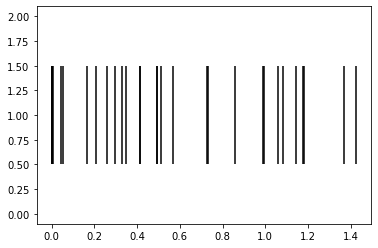

In [418]:
plt.eventplot((spikes_json['spikeT']['5'][:30]), colors = 'k') #time (s) vs. num spikes


In [739]:
ephys.shape
spikes_json.keys()


dict_keys(['Amplitude', 'ContamPct', 'KSLabel', 'amp', 'ch', 'depth', 'fr', 'group', 'n_spikes', 'sh', 'waveform', 'spikeT', 't0'])

In [726]:
spikes_json.keys()

dict_keys(['Amplitude', 'ContamPct', 'KSLabel', 'amp', 'ch', 'depth', 'fr', 'group', 'n_spikes', 'sh', 'waveform', 'spikeT', 't0'])

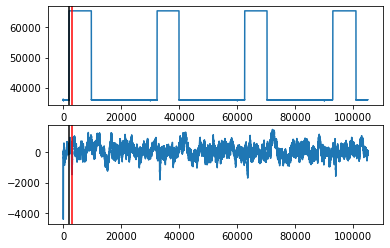

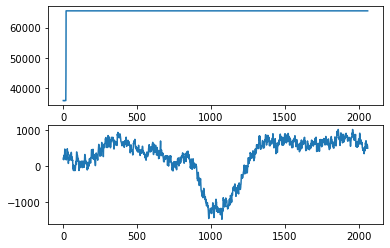

[35935 44335 65535 65535]
[35893 65535 65535 65535]
3013
35.166666666666664 msec


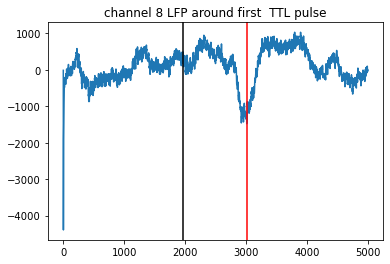

In [679]:
ax1 = plt.subplot(211)#ttl_onset[1000:15000]
ax1.plot(ttl_onset[0:105000])
plt.axvline(x = 1958, color = 'k')
plt.axvline(x = peak, color = 'r')
ax2 = plt.subplot(212, sharex = ax1) #plt.plot(ephys[:, 5][1000:15000])
ax2.plot(ephys[:, 8][0:105000]) #8 looks like a good channel for a timing check
plt.axvline(x = 1958, color = 'k')
plt.axvline(x = peak, color = 'r')

plt.show()

ax3 = plt.subplot(211)
ax3.plot(ttl_onset[1940:4000])
ax4 = plt.subplot(212, sharex = ax3)
ax4.plot(ephys[:, 8][1940:4000])
plt.show()

print(ttl_onset[1957:1961]) #manually-found pulse ranges for first two pulses
print(ttl_onset[32336:32340])
plt.plot(ephys[:, 8][:5000])
plt.axvline(x=1958, color = 'k') #overlaid vertical line for ttl onset
#plt.axvline(x=32338, color = 'k')
plt.title('channel 8 LFP around first  TTL pulse')

peak = np.argmin(ephys[:, 8][2000:4000])+2000 #add 2000 to bring back to full experiment timcourse
print(peak)
plt.axvline(x = peak, color = 'r')
delay = (peak - 1958)/ 30
print(delay, 'msec')


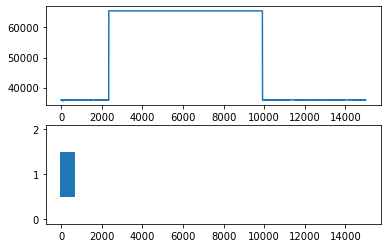

In [620]:
ax1 = plt.subplot(211)#ttl_onset[1000:15000]
ax1.plot(ttl_onset[30000:45000])
ax2 = plt.subplot(212, sharex = ax1) #plt.plot(ephys[:, 5][1000:15000])
ax2.eventplot(spikes_json['spikeT']['8'])
plt.show()



[35935 44335 65535 65535]
[35893 65535 65535 65535]


Text(0.5, 1.0, 'channel 8 LFP around first two TTL pulses')

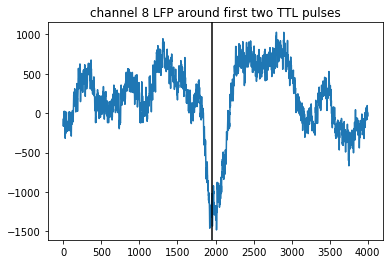

In [623]:
print(ttl_onset[1957:1961]) #manually-found pulse ranges for first two pulses
print(ttl_onset[32336:32340])
plt.plot(ephys[:, 8][1000:5000])
plt.axvline(x=1958, color = 'k') #overlaid vertical line for ttl onset
#plt.axvline(x=32338, color = 'k')
plt.title('channel 8 LFP around first two TTL pulses')

In [63]:
onset_from_ttl = newtime1[onsetInd1].copy()

In [65]:
sz = 0.2*30000
ch = 26

lfp_around_ttl = np.zeros([onset_from_ttl.size, int(sz*2)])

for i, t in enumerate(onset_from_ttl):
    ind = np.argmin(np.abs(t-(newtime1)))
    startInd = int(ind-sz); endInd = int(ind+sz)
    
    #lfp_around_ttl[i,:] = filtephys[startInd:endInd, ch]

KeyboardInterrupt: 

# Get the mean LFP around each TTL onset for all units!

In [ ]:
sz = 0.2*30000

all_lfp_around_ttl = np.zeros([128, int(sz*2)])

for ch in tqdm(range(128)):
    lfp_around_ttl = np.zeros([onset_from_ttl.size, int(sz*2)])
    for i, t in enumerate(onset_from_ttl):
        ind = np.argmin(np.abs(t-(newtime1)))
        startInd = int(ind-sz); endInd = int(ind+sz)

        lfp_around_ttl[i,:] = filtlfp[startInd:endInd, ch]
    
    all_lfp_around_ttl[ch,:] = np.nanmean(lfp_around_ttl, 0)
    

 30%|██████████████████▉                                           | 39/128 [11:11<25:28, 17.18s/it]

(-0.1, 0.2)

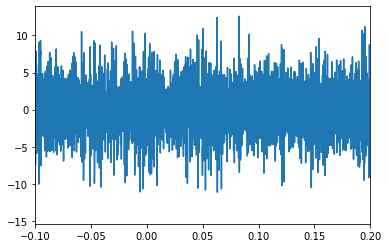

In [70]:
plt.plot(np.linspace(-.25, .25, 12000), all_lfp_around_ttl[0,:])
plt.xlim([-0.1,0.2])

(-0.2, 0.2)

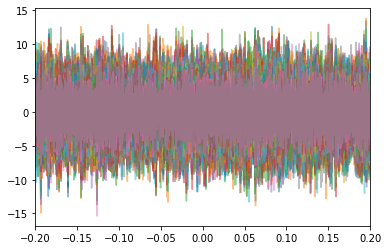

In [67]:
for i in range(128):
    plt.plot(np.linspace(-.25, .25, 12000), all_lfp_around_ttl[i,:], alpha=0.5)
plt.xlim([-0.2,0.2])

In [ ]:
sz = 0.2*30000
ch = 26
onset_arr = ttl_onset-np.median(ttl_onset)
wc_flipT = (eventT-t0)+(np.median(np.diff(worldT))/2)
wc_flipT = eventT-t0

lfp_around_wc = np.zeros([eventT.size, int(sz*2)])
ttl_around_wc = np.zeros([eventT.size, int(sz*2)])

for i, t in enumerate(wc_flipT):
    ind = np.argmin(np.abs(t-(newtime1)))
    startInd = int(ind-sz)
    endInd = int(ind+sz)
    if (endInd > np.size(filtephys, 0)) or (startInd < 0):
        lfp_around_wc[i,:] = np.nan
        ttl_around_wc[i,:] = np.nan
    else:
        lfp_around_wc[i,:] = filtephys[startInd:endInd, ch]
        ttl_around_wc[i,:] = onset_arr[startInd:endInd]

In [ ]:
# mean_lfp_around_ttl = np.mean(lfp_around_ttl, 0)
mean_lfp_around_wc = np.nanmean(lfp_around_wc, 0)
mean_ttl_around_wc = np.nanmean(ttl_around_wc, 0)

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(mean_lfp_around_wc*25, label='lfp')
plt.plot(mean_ttl_around_wc, label='ttl')
plt.vlines(6000, -2000, 2000, 'k')
plt.xticks(np.linspace(0, 12000, 7), np.round(np.linspace(-.2, 0.2, 7),2))

## fig

NameError: name 'eventT' is not defined

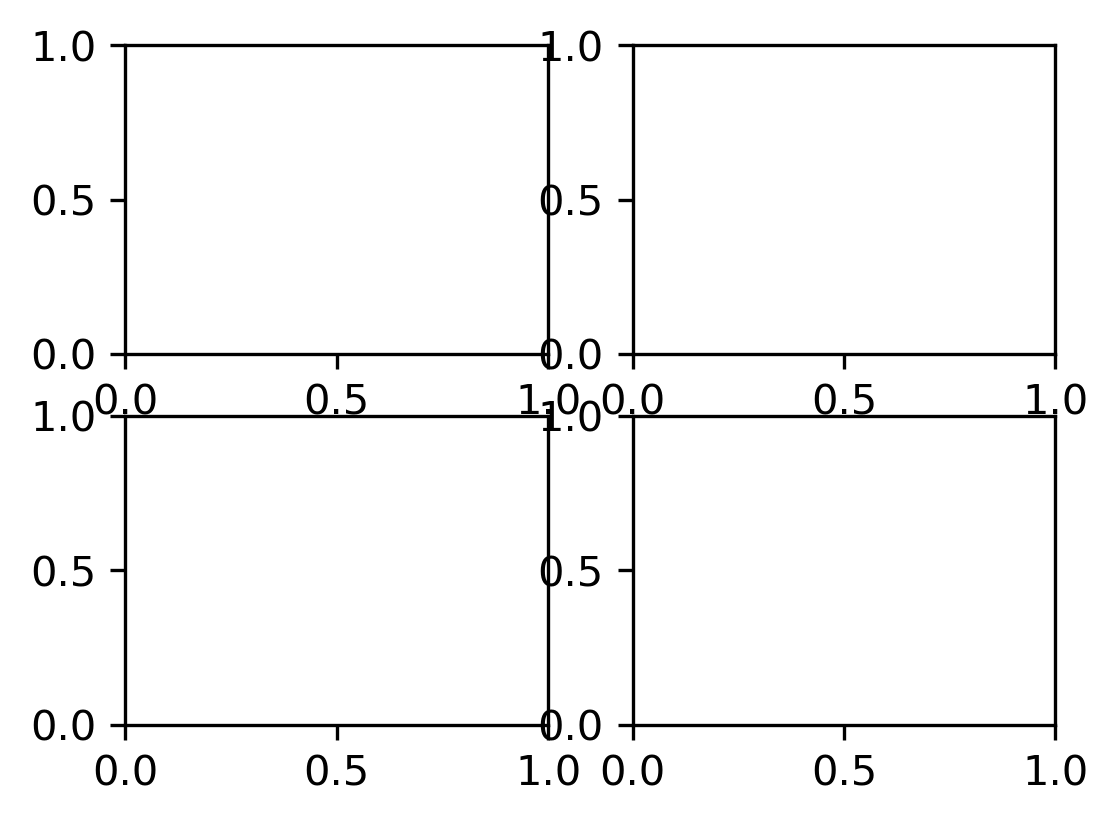

In [66]:
cell = 49
ch = chan[cell]

sz = 5000
szT = np.median(np.diff(newtime1))*(sz*2)

sp = spikeT[cell].copy()

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2,2,figsize=(4,3), dpi=300)

for i, f in enumerate(eventT-t0):
    ind = np.argmin(np.abs(f-(newtime1)))
    startInd = ind-sz; endInd = ind+sz
    startT = f-szT; endT = f+szT
    
    # raster
    ax1.vlines(sp[(sp>startT) & (sp<endT)]-f, i-0.25, i+0.25)
# LFP
ax0.plot(np.linspace(-.25, .25, 12000), mean_lfp_around_wc, linewidth=1, alpha=0.5)

ax0.set_title('LFP (around wc)')
ax0.vlines(0, -100, 100, 'k')
ax0.set_xlabel('sec')

ax1.set_title('LFP spikeT (around wc)')
ax1.vlines(0, 0, np.size(eventT,0), 'k')
ax1.set_xlim([-.25,.25])
ax1.set_xlabel('sec')
ax1.set_ylabel('flip')

#####
for i, f in enumerate(onset_from_ttl):
    ind = np.argmin(np.abs(f-(newtime1)))
    startInd = ind-sz; endInd = ind+sz
    startT = f-szT; endT = f+szT
    
    # raster
    ax3.vlines(sp[(sp>startT) & (sp<endT)]-f, i-0.25, i+0.25)
# LFP
ax2.plot(np.linspace(-.25, .25, 12000), mean_lfp_around_ttl, linewidth=1, alpha=0.5)
ax2.set_title('LFP (around TTL)')
ax2.vlines(0, -100, 100, 'k')
ax2.set_xlabel('sec')

ax3.set_title('LFP spikeT (around TTL)')
ax3.vlines(0, 0, np.size(onset_from_ttl,0), 'k')
ax3.set_xlim([-.25,.25])
ax3.set_xlabel('sec')
ax3.set_ylabel('flip')

fig.tight_layout()

In [48]:
import sys, os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.neighbors import KernelDensity

In [49]:
def calc_kde_sdf(spikeT, eventT, bandwidth=10, resample_size=1, edgedrop=15, win=1000):
    """
    bandwidth (in msec)
    resample_size (msec)
    edgedrop (msec to drop at the start and end of the window so eliminate artifacts of filtering)
    win = 1000msec before and after
    """
    # some conversions
    bandwidth = bandwidth/1000 # msec to sec
    resample_size = resample_size/1000 # msec to sec
    win = win/1000 # msec to sec
    edgedrop = edgedrop/1000
    edgedrop_ind = int(edgedrop/resample_size)

    # setup time bins
    bins = np.arange(-win-edgedrop, win+edgedrop+resample_size, resample_size)

    # get timestamp of spikes relative to events in eventT
    sps = []
    for i, t in enumerate(eventT):
        sp = spikeT-t
        sp = sp[(sp <= (win+edgedrop)) & (sp >= (-win-edgedrop))] # only keep spikes in this window
        sps.extend(sp)
    sps = np.array(sps) # all values in here are between -1 and 1

    # kernel density estimation
    kernel = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(sps[:,np.newaxis])
    density = kernel.score_samples(bins[:,np.newaxis])
    sdf = np.exp(density)*(np.size(sps)/np.size(eventT)) # convert back to spike rate
    sdf = sdf[edgedrop_ind:-edgedrop_ind]

    return sdf

In [53]:
len(lfp_spikeT[0])

20325

In [ ]:
for t in onset_from_ttl:
    

In [54]:
all_psth = np.zeros([len(lfp_spikeT), 2001])
for i, ch in tqdm(enumerate(range(len(lfp_spikeT)))):
    sp = lfp_spikeT[ch]
    all_psth[i,:] = calc_kde_sdf(sp, onset_from_ttl)

128it [03:24,  1.60s/it]


In [55]:
psth_bins = np.arange(-1,1.001,1/1000)

In [59]:
all_psth.shape

(128, 2001)

In [60]:
128/10

12.8

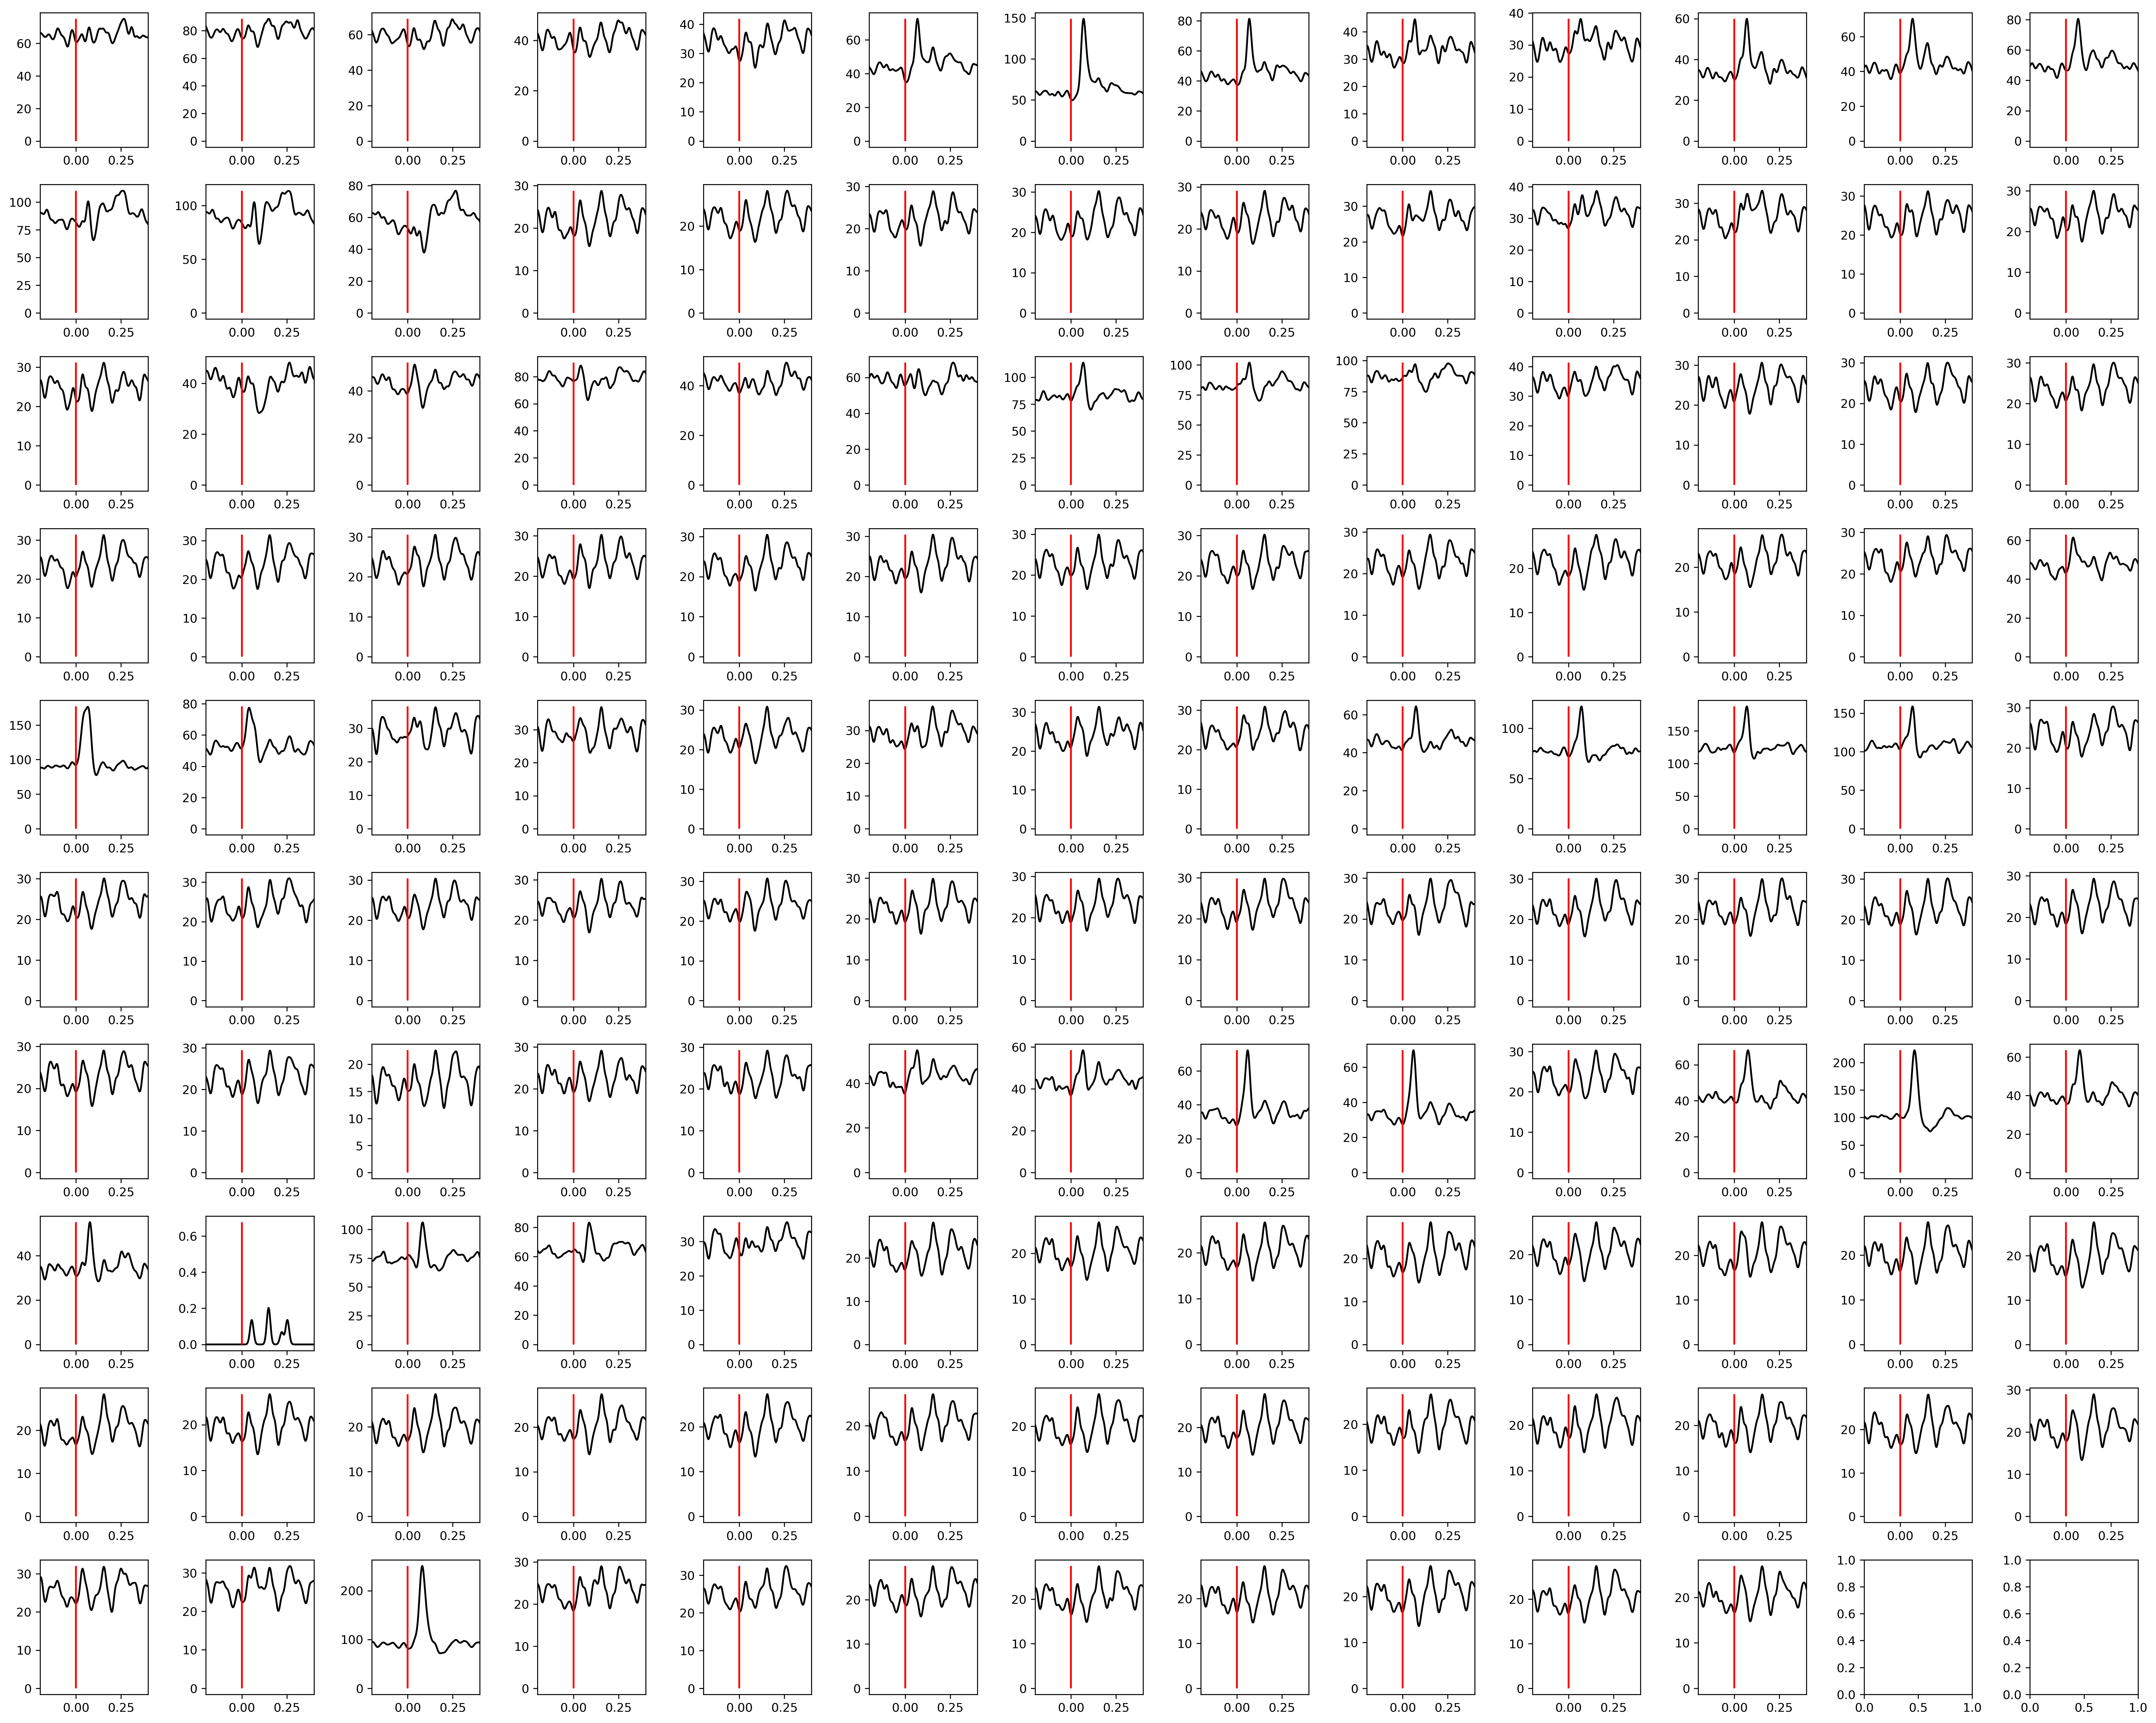

In [62]:
plt.subplots(10,13, figsize=(25,20), dpi=300)
for i in range(np.size(all_psth,0)):
    plt.subplot(10,13,i+1)
    plt.plot(psth_bins, all_psth[i,:], 'k')
    plt.xlim([-0.2,0.4])
    plt.vlines(0, 0, np.max(all_psth[i,:]), color='r')
plt.tight_layout()

In [ ]:
for i in range
plt.plot()

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(newtime1, ttl_onset-np.median(ttl_onset), label='ttl')
plt.plot(newtime1, filt_ephys[:,1]*30, label='lfp ch=1')
plt.plot(worldT[:-1]-t0, label_diff*30000, label='worldT')
plt.xlim([0.2, 0.3])
plt.legend()
plt.ylim([-40000,40000])

In [ ]:
f = onset_from_ttl[5]
ind = np.argmin(np.abs(f-(newtime1)))
startInd = ind-sz; endInd = ind+sz
startT = f-szT; endT = f+szT
sp[(sp>startT) & (sp<endT)]

In [ ]:
f = (eventT-t0)[5]
ind = np.argmin(np.abs(f-(newtime1)))
startInd = ind-sz; endInd = ind+sz
startT = f-szT; endT = f+szT
sp[(sp>startT) & (sp<endT)]

NameError: name 'filt_ephys' is not defined

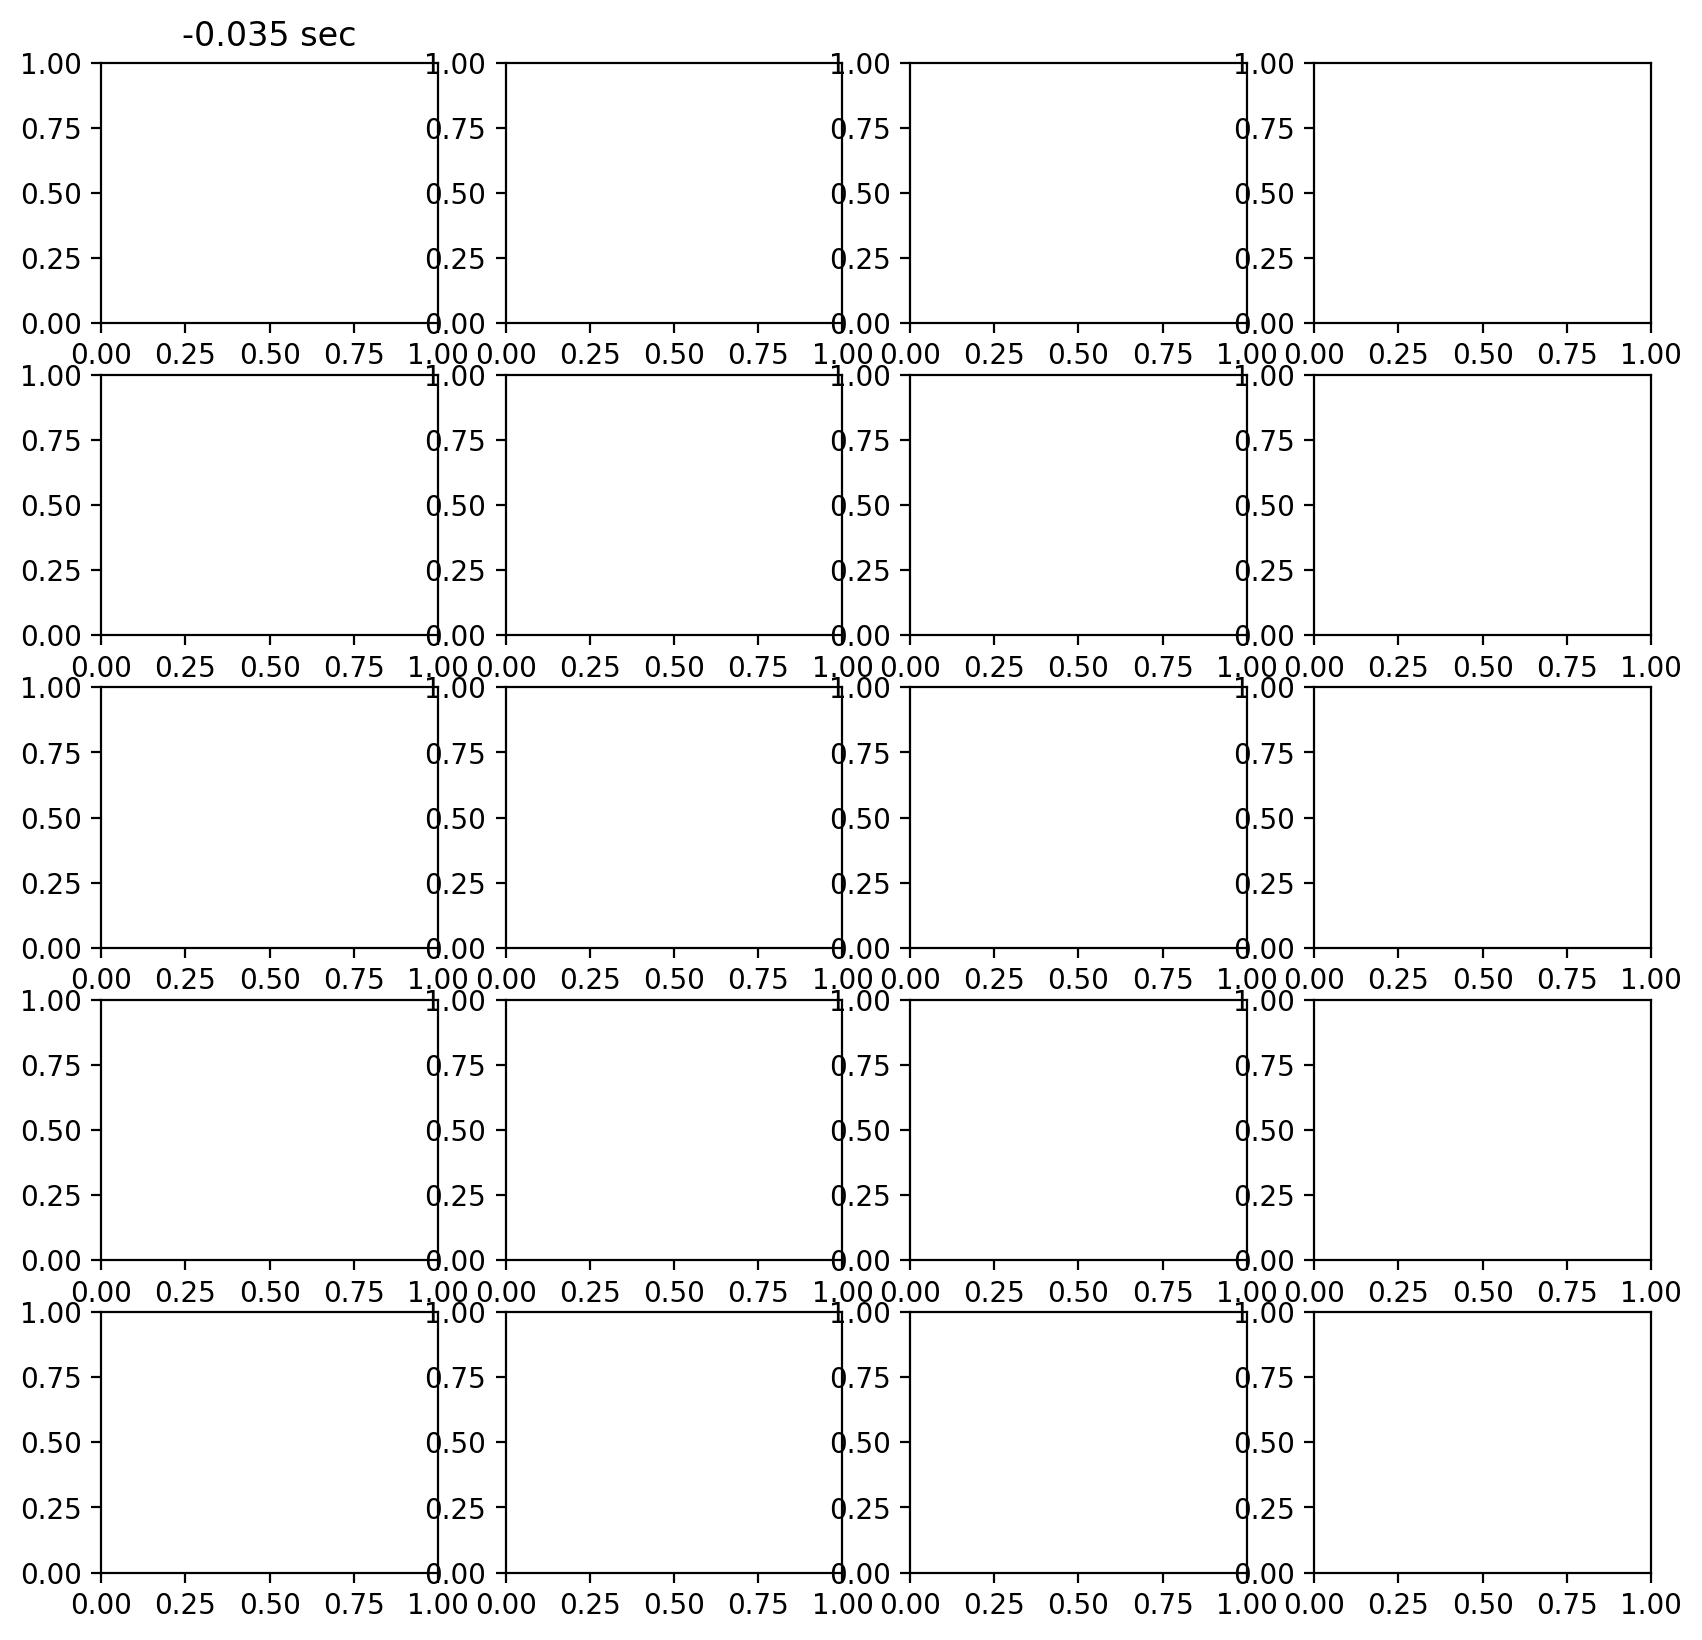

In [67]:
start = 0
end = 3000000

ch = 2

plt.subplots(5,4,figsize=(10,10),dpi=200)

for i in range(20):
    plt.subplot(5,4,i+1)
    
    flipT = onset_from_ttl[i]
    
    win_start = flipT-0.15
    win_end = flipT+0.20

    plt.title('{} sec'.format(np.round(flipT,3)))
    
    # LFP
    plt.plot(newtime1[start:end], filt_ephys[start:end,ch], color='tab:blue')
    # plt.plot(newtime, ttl_onset)
    
    # TTL
    plt.plot(newtime1[start:end], (ttl_onset[start:end]-np.median(ttl_onset[start:end])), color='dimgrey', linewidth=1)

    plt.ylim([-1000, 1000])
    plt.xlim([win_start, win_end])

    plt.xticks(np.linspace(flipT-.15, flipT+.2, 5), labels=np.linspace(-150, 200, 5).astype(int))
    
    # Worldcam flipT
    wcT = eventT[np.argmin(np.abs((eventT-t0)-onset_from_ttl[i]))]-t0
    plt.vlines(wcT, -700, 700, color='k')
    
plt.tight_layout()

In [ ]:
np.linspace(-300, 300, 7)

In [ ]:
np.linspace(flipT-.3, flipT+.3, 7)

In [ ]:
i = 20
print('TTL={} worldcam={}'.format(onset_from_ttl[i],
        eventT[np.argmin(np.abs((eventT-t0)-onset_from_ttl[i]))]-t0))

In [ ]:
plt.plot(np.abs((eventT-t0)-100))

In [ ]:
wcT

In [ ]:
newtime[start:end].max()

In [ ]:
eventT[5]-t0

In [ ]:
ephys_df = pd.read_hdf('/home/niell_lab/Mounts/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/070921/J553RT/fm1/070921_J553RT_control_Rig2_fm1_ephys_props.h5')

In [ ]:
[x for x in ephys_df if 'T' in x]

In [ ]:
ephys_df.index.values

In [ ]:
row = ephys_df.iloc[31]

In [ ]:
row['spikeT'][:5]

In [ ]:
row['FmLt_imuT'].values[:5]

In [ ]:
row['FmLt_imuT'].shape

In [ ]:
row['FmLt_eyeT'][:5]

In [ ]:
row['FmLt_eyeT'].shape

In [ ]:
row['FmLt_topT'][:5]

In [ ]:
import json

In [ ]:
ephys_json = '/home/niell_lab/Mounts/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/070921/J553RT/fm1/070921_J553RT_control_Rig2_fm1_ephys_merge.json'

In [ ]:
with open(ephys_json, 'r') as fp:
    ephys = json.load(fp)

In [ ]:
ephys['spikeT']['0'][:5]

In [ ]:
ephys['t0']